In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## NavieBayes

In [8]:
# Importando base de dados
credito = pd.read_csv('../Dados/Credit.csv')
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [9]:
# Separando dados e classe (Feature, Target)
previsores = credito.iloc[:, 0:20].values
classe = credito.iloc[:, 20].values

In [10]:
# Convertendo valores categóricos em numéricos
label_enconder = LabelEncoder()
previsores[:, 0] = label_enconder.fit_transform(previsores[:, 0])
previsores[:, 2] = label_enconder.fit_transform(previsores[:, 2])
previsores[:, 3] = label_enconder.fit_transform(previsores[:, 3])
previsores[:, 5] = label_enconder.fit_transform(previsores[:, 5])
previsores[:, 6] = label_enconder.fit_transform(previsores[:, 6])
previsores[:, 8] = label_enconder.fit_transform(previsores[:, 8])
previsores[:, 9] = label_enconder.fit_transform(previsores[:, 9])
previsores[:, 11] = label_enconder.fit_transform(previsores[:, 11])
previsores[:, 13] = label_enconder.fit_transform(previsores[:, 13])
previsores[:, 14] = label_enconder.fit_transform(previsores[:, 14])
previsores[:, 16] = label_enconder.fit_transform(previsores[:, 16])
previsores[:, 18] = label_enconder.fit_transform(previsores[:, 18])
previsores[:, 19] = label_enconder.fit_transform(previsores[:, 19])

# Dividindo base entre treino e teste
X_training, X_test, y_training, y_test = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)

In [11]:
# Criando modelo de treinamento e teste
# Nesta bilbioteca não é possível ver a tabela de probabilidade gerada pelo modelo
navie_bayes = GaussianNB()
navie_bayes.fit(X_training, y_training)

GaussianNB()

In [12]:
# Testando modelo
previsoes = navie_bayes.predict(X_test)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [13]:
# Gerando matriz de confusão
confusao = confusion_matrix(y_test, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [14]:
# Verificando taxa de acerto
taxa_acerto = accuracy_score(y_test, previsoes)
taxa_acerto

0.71

In [15]:
# Verificando taxa de erro
taxa_erro = 1 - taxa_acerto
taxa_erro

0.29000000000000004

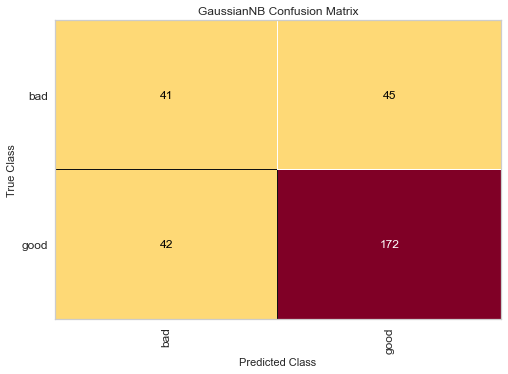

<AxesSubplot:title={'center':'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [16]:
# Gerando gráfico matriz de confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_training, y_training)
v.score(X_test, y_test)
v.show()

In [17]:
# Simulando Dados de Produção
novo_credito = pd.read_csv('../Dados/NovoCredit.csv')
novo_previsores = novo_credito.iloc[:, 0:20].values

# Convertendo valores categóricos em numéricos
label_enconder = LabelEncoder()
novo_previsores[:, 0] = label_enconder.fit_transform(novo_previsores[:, 0])
novo_previsores[:, 2] = label_enconder.fit_transform(novo_previsores[:, 2])
novo_previsores[:, 3] = label_enconder.fit_transform(novo_previsores[:, 3])
novo_previsores[:, 5] = label_enconder.fit_transform(novo_previsores[:, 5])
novo_previsores[:, 6] = label_enconder.fit_transform(novo_previsores[:, 6])
novo_previsores[:, 8] = label_enconder.fit_transform(novo_previsores[:, 8])
novo_previsores[:, 9] = label_enconder.fit_transform(novo_previsores[:, 9])
novo_previsores[:, 11] = label_enconder.fit_transform(novo_previsores[:, 11])
novo_previsores[:, 13] = label_enconder.fit_transform(novo_previsores[:, 13])
novo_previsores[:, 14] = label_enconder.fit_transform(novo_previsores[:, 14])
novo_previsores[:, 16] = label_enconder.fit_transform(novo_previsores[:, 16])
novo_previsores[:, 18] = label_enconder.fit_transform(novo_previsores[:, 18])
novo_previsores[:, 19] = label_enconder.fit_transform(novo_previsores[:, 19])

# Testando modelo
navie_bayes.predict(novo_previsores)

array(['good'], dtype='<U4')